<a href="https://colab.research.google.com/github/subramanya4shenoy/MachineLearningNbs/blob/main/Kaggle/Competitions/PGS_S3E16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦀 Regression with a Crab Age Dataset 🦀
Playground Series - Season 3, Episode 16

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## 🔶 Look at the big Picture

### 🔸 **Frame the problem**
*   🟢 **Goal:** Our objective is to predict the probability of Age of Crab 🦀 🗒
*   🟢 **End Result:** `int` or `float` 🗒
*   🟢 **Problem Type:** Regression
*   🟢 **Learning Type:** Supervised Learning
*   🟢 **Variate:** Univariate (need to predict only 1 target)
*   🟢 **Features:** Multiple features

### 🔸 **Select performance measure**:
🟢 using Mean Absolute Error (MAE) 🗒 . This was given in the problem set. This also means there might be chances of high outliers.

### 🔸 **Assumptions**: `none`

---



## 🔶**Get the Data**

* 🟢 Get the kagle.json file into local
* 🟢 Download the data set from the kaggle (as zip)
* 🟢 Extract the zip into local and delete the Zip

* 🟢 Read the train set and test set store it in Pandas dataFrame

### 🔸 **Take Quick look**
* 🟢 .head() to see the index columns and quick look at the data
* 🟢 .shape to see the size of training set
* 🟢 .info() to see the data types and missing values
* 🟢 .value_counts() on categorical data to check if all the categories are equaly represented and to check the weightages.
* 🟢 .describe() to check mean and std deviation, min, max this gives a hint of how data is distributed and what is the max values, min values and is there any scaled data or not.
* 🟢 .hist() to see the distribution of data and if any outliers, tail heavy etc.

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

### 🔸 **Observation**

* 👁  has extra index column, which can be removed
* 👁  has limited columns (10)


* 👁  has 74K data. My train & test split will be 8:2


* 👁  has 10 columns with 9 numeric value and 1 categorical column. Not seeing any missing data in any columns


* 👁  checking the unique value counts in categorical column (sex)
* 👁  We see the strats are well representative for now.


* 👁  Age is in integer (max is 29 and min being 1, need to check the scale of this)
* 👁  length, height and diameter numeric values are in range of 0 - 2
* 👁  we have 3 weights which looks related. (vw + sw = w)


* 👁  nothing unsusual or outliers as such from histograph

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


In [1]:
"""
Basic setup for integrating Kaggle
Make sure the kaggle.json file is available and uploaded in session
"""
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
"""
Common method to get the data from kaggle
"""
def get_data_from_kaggle():
  !kaggle competitions download -c playground-series-s3e16 #Path to the dataset from kaggle
  !unzip \*.zip && rm *.zip #unzipping the files and removing the zip

In [ ]:
get_data_from_kaggle()

In [42]:
import pandas as pd

train_df = pd.read_csv('train.csv', index_col='id') #Index_col added post observation
test_df = pd.read_csv('test.csv', index_col='id') #Index_col added post observation

In [43]:
'''
Observation:
1. has extra Id column, which can be removed
2. has limited columns
'''
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [44]:
'''
Observation:
1. has 74K data
2. my split will be 8:2
'''
train_df.shape

(74051, 9)

In [45]:
'''
Observation:
1. 10 columns with 9 numeric value and 1 categorical column
2. Not seeing any missing data.
'''
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [46]:
'''
Observation:
1. checking the uniq value counts in categorical column (sex)
2. We see the strats are well representative for now.
'''
train_df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [47]:
'''
Observation:
1. Age is in integer (max is 29 and min being 1, need to check the scale of this)
2. length, height and diameter numeric values are in range of 0 - 2
3. we have 3 weights which looks related. (vw + sw = w)
'''
train_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


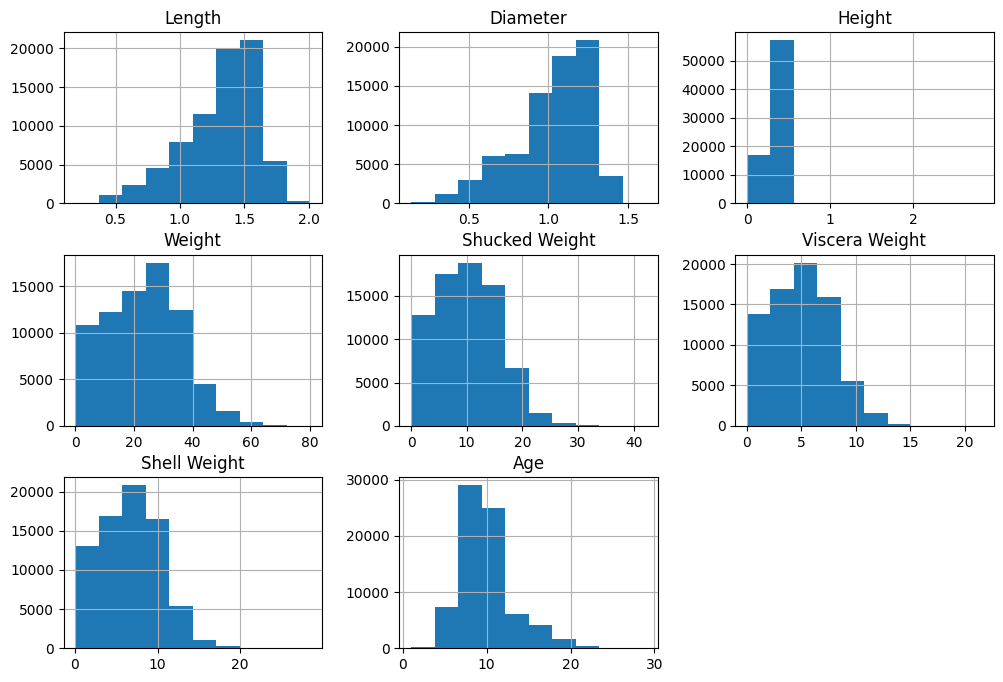

In [48]:
import matplotlib.pyplot as plt
'''
Observation:
1. nothing unsusual or outliers as such from hist
'''
train_df.hist(figsize=(12,8))
plt.show()